In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy
import spacy
from nltk.corpus import stopwords
from collections import Counter
%matplotlib inline
sns.set_style("darkgrid")
sns.set_palette("husl")

In [2]:
mel_raw = pd.read_csv('Melbourne_housing_FULL.csv')

mel_raw.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


### Explore the Data

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


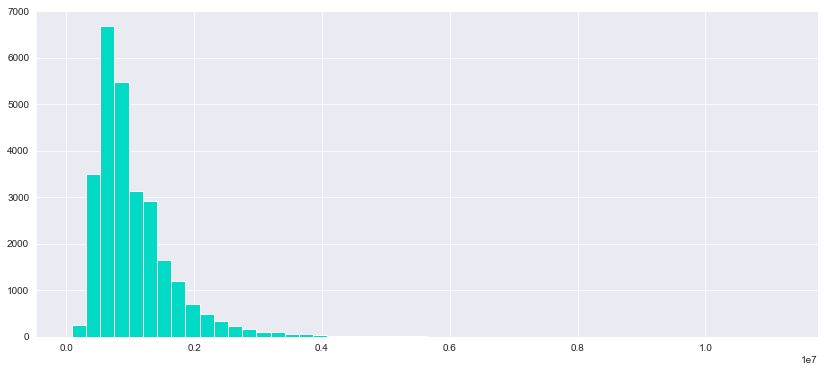

In [3]:
plt.figure(figsize=(14,6))
plt.hist(mel_raw.Price, bins=50, color='#03DAC6')
plt.show()

In [4]:
mel_raw.Date = pd.to_datetime(mel_raw.Date)
mel_raw['Year'] = pd.DatetimeIndex(mel_raw.Date).year
mel_raw['Month'] = pd.DatetimeIndex(mel_raw.Date).month
mel_raw['Day'] = pd.DatetimeIndex(mel_raw.Date).day
mel_raw[['Date','Year','Month','Day']].head()

,Date,Year,Month,Day
0,2016-03-09,2016,3,9
1,2016-03-12,2016,3,12
2,2016-04-02,2016,4,2
3,2016-04-02,2016,4,2
4,2017-04-03,2017,4,3


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


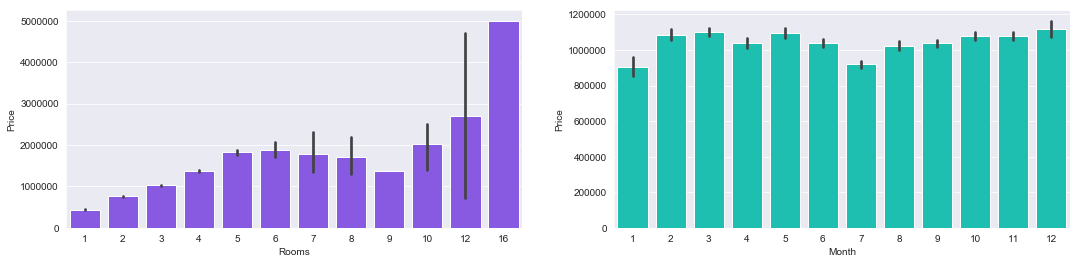

In [5]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.barplot(data=mel_raw, x='Rooms', y='Price', color='#7F44F7')
plt.subplot(1,2,2)
sns.barplot(data=mel_raw, x='Month', y='Price', color='#03DAC6')
plt.show()

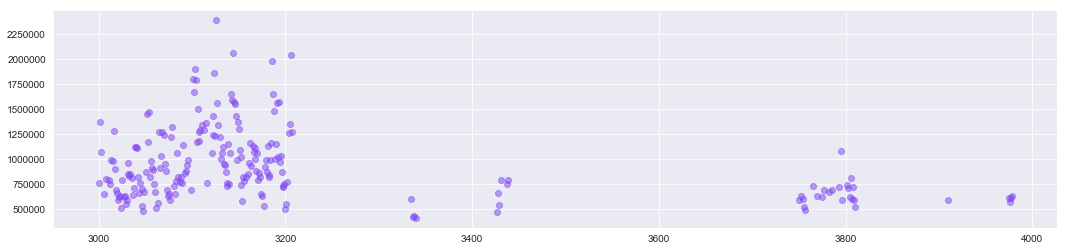

In [6]:
post_plt = pd.DataFrame(mel_raw[['Postcode','Price']].groupby('Postcode')['Price'].mean())
post_plt.reset_index(level=0, inplace=True)

plt.figure(figsize=(18,4))
plt.scatter(data=post_plt, x='Postcode', y='Price', color='#7F44F7', alpha=.5)
plt.show()

In [16]:
#seller = mel_raw.groupby('SellerG')['Price'].nunique().sort_values(ascending=False).head(40)
seller_plt = pd.DataFrame(mel_raw[['SellerG','Price']].groupby('SellerG')['Price'].mean().sort_values(ascending=False))
seller_plt['count'] = mel_raw.groupby('SellerG')['Price'].nunique()
seller_plt.reset_index(level=0, inplace=True)
seller_plt.sort_values(by='count', ascending=False).head(60)

,SellerG,Price,count
46,Jellis,1.350790e+06,963
111,Nelson,1.020569e+06,888
143,hockingstuart,9.348711e+05,829
172,Barry,8.516253e+05,795
174,Ray,8.457005e+05,732
64,Buxton,1.230554e+06,631
14,Marshall,1.961798e+06,623
120,Biggin,1.001372e+06,389
105,Woodards,1.060169e+06,372
56,Fletchers,1.289627e+06,362


In [45]:
mel_raw.shape

(34857, 24)

### Check for Nulls / Clean Data

In [46]:
nullvals = pd.DataFrame(mel_raw.isna().sum())
nullvals

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,7610
Method,0
SellerG,0
Date,0
Distance,1
Postcode,1


In [47]:
mel = mel_raw.drop(columns=['BuildingArea', 'Landsize','YearBuilt'])
mel = mel.dropna()

In [48]:
mel.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Month,Day
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2016,3,12
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2016,4,2
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,2017,4,3
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,...,2.0,1.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,2017,4,3
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,...,1.0,2.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,2016,4,6


In [49]:
top_seller = seller_plt.sort_values(by='count', ascending=False).head(60)
worst_seller = seller_plt.sort_values(by='count', ascending=False).tail(328)
top_list = top_seller.SellerG.values
worst_list = worst_seller.SellerG.values

In [52]:
# Create dummies for some of the features

dummies = pd.get_dummies(mel[['SellerG','Type', 'Method']])

mel = mel.join(dummies)

In [53]:
mel.Regionname.unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [54]:
mel.Suburb = mel.Suburb.astype('category')
#mel.Type = mel.Type.astype('category')
#mel.SellerG = mel.SellerG.astype('category')
#mel.Method = mel.Method.astype('category')
mel.Regionname = mel.Regionname.astype('category')
mel.CouncilArea = mel.CouncilArea.astype('category')

In [56]:
# Create Categories for some of the data
mel['suburbCodes'] = mel.Suburb.cat.codes
#mel['typeCodes'] = mel.Type.cat.codes
#mel['methodCodes'] = mel.Method.cat.codes
#mel['sellerCodes'] = mel.SellerG.cat.codes
mel['regionCodes'] = mel.Regionname.cat.codes
mel['councilCodes'] = mel.CouncilArea.cat.codes
mel.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,suburbCodes,regionCodes,councilCodes
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,0,0,0,1,0,0,0,0,2,31
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,0,0,0,1,0,0,0,0,2,31
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,0,0,0,0,0,1,0,0,2,31
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,...,0,0,1,0,0,0,0,0,2,31
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,...,0,0,0,0,0,0,1,0,2,31


In [57]:
mel.Type.unique()

array(['h', 'u', 't'], dtype=object)

In [59]:
mel.dtypes.head()

Suburb     category
Address      object
Rooms         int64
Type         object
Price       float64
dtype: object

### Select K Best

In [86]:
drop_columns = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname','Price']

from sklearn.feature_selection import SelectKBest, f_classif

X = mel.drop(drop_columns, 1)
y = mel['Price']

selector=SelectKBest(score_func=f_classif,k=111)
selector.fit(X,y)
scores = pd.DataFrame()
scores["Attribute"] = X.columns
scores["F Score"] = selector.scores_
scores["P Value"] = selector.pvalues_
scores["Support"] = selector.get_support()

scores = scores.sort_values(by=['F Score'], ascending=False)

key_vals = scores.Attribute.loc[scores['P Value']<.05].values

scores.loc[scores['P Value']<.05]

,Attribute,F Score,P Value,Support
294,SellerG_VICProp,15.434582,0.000000e+00,True
26,SellerG_Assisi,8.232046,0.000000e+00,True
18,SellerG_Allens,7.840012,0.000000e+00,True
109,SellerG_Galldon,7.002856,0.000000e+00,True
95,SellerG_Elite,6.952637,0.000000e+00,True
152,SellerG_L,5.079853,0.000000e+00,True
0,Rooms,4.133938,0.000000e+00,True
334,Type_u,3.900581,0.000000e+00,True
3,Bedroom2,3.813118,0.000000e+00,True
24,SellerG_Ash,3.762828,0.000000e+00,True


## Modeling

In [87]:
X = mel[key_vals]
y = mel['Price']

# to split a training and test sample
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Linear Regression

In [88]:
from datetime import datetime
start_time = datetime.now()

from sklearn import metrics
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
# Set Up Predictor
ypred_reg = reg.predict(x_test)

print('Coefficients:')
print(reg.coef_)
print('\nIntercept:')
print(reg.intercept_)

print('\nTrain Percentage accuracy:')
print(reg.score(x_train, y_train))

print('\nTest Percentage accuracy:')
print(reg.score(x_test, y_test))

print('\nCross Validation:')
print(cross_val_score(reg, x_train, y_train, cv = 5))

print("\nMAE:", metrics.mean_absolute_error(y_test, ypred_reg))
print('MSE:', metrics.mean_squared_error(y_test, ypred_reg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred_reg)))

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

Coefficients:
[ 1.98694985e+06  7.22672110e+05 -1.08406021e+05 -1.27615575e+05
  7.38887784e+04  6.73974016e+05  1.82370946e+05 -1.41380169e+05
 -1.74518803e+04  1.65230850e+05  1.76551796e+04  4.63825312e+04
 -5.20821469e+05 -1.09653322e+05 -4.12857456e+05 -8.06570906e-10
  1.87669307e+05  1.49435569e+05  3.14371665e+05  6.08775803e+05
 -2.42170707e+05  1.40314622e+05  3.34004212e+04  1.29696891e-10
  6.58252613e-10  5.21332190e-10  1.15135375e+06 -1.21305686e+05
  2.09822357e+05 -4.79889659e+04  9.95608038e+05  8.32393477e+05
 -2.02258951e+05  6.45451382e+04  7.88595018e+05  6.27229880e+05
  2.12549897e+05  1.01703158e+05 -2.35729335e+05 -9.60112334e+03
 -3.51063780e+03  6.02465862e+04 -1.80521962e+05  7.28537956e+03
 -3.60143337e+05  7.50684001e-10  3.99934396e+05 -1.72440136e+05
  4.65607890e+05 -2.79658825e+05 -3.90539745e+04 -2.39819857e+05
  9.85611811e+05  1.22180800e+05  4.13231686e+02 -3.06330984e+04
 -4.64267768e+04 -1.04851866e+06 -4.85846254e+04  1.60331928e+05
  2.5772285

### KNN

In [64]:
start_time = datetime.now()

from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=30)
knn.fit(x_train, y_train)
# Set Up Predictor
ypred_knn = knn.predict(x_test)

#print('Coefficients:')
#print(knn.coef_)
#print('\nIntercept:')
#print(knn.intercept_)

print('\nTrain Percentage accuracy:')
print(knn.score(x_train, y_train))

print('\nTest Percentage accuracy:')
print(knn.score(x_test, y_test))

print('\nCross Validation:')
print(cross_val_score(knn, x_train, y_train, cv = 5))

print("\nMAE:", metrics.mean_absolute_error(y_test, ypred_knn))
print('MSE:', metrics.mean_squared_error(y_test, ypred_knn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred_knn)))

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))


Train Percentage accuracy:
0.6911294601227587

Test Percentage accuracy:
0.6429977565913345

Cross Validation:
[0.63625724 0.63831671 0.65392151 0.67372795 0.61137837]

MAE: 233571.24980722737
MSE: 160379801561.48676
RMSE: 400474.4705489811

Duration: 0:00:03.072075


### Decision Tree

In [78]:
start_time = datetime.now()
from sklearn import tree

dec_tr = tree.DecisionTreeRegressor(
    max_features=8,
    max_depth=30,
    random_state = 1337
)

dec_tr.fit(x_train, y_train)
# Set Up Predictor
ypred_dec_tr = dec_tr.predict(x_test)

print('\nTrain Percentage accuracy:')
print(dec_tr.score(x_train, y_train))

print('\nTest Percentage accuracy:')
print(dec_tr.score(x_test, y_test))

print('\nCross Validation:')
print(cross_val_score(dec_tr, x_train, y_train, cv = 5))

print("\nMAE:", metrics.mean_absolute_error(y_test, ypred_dec_tr))
print('MSE:', metrics.mean_squared_error(y_test, ypred_dec_tr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred_dec_tr)))

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))


Train Percentage accuracy:
0.9873873416134563

Test Percentage accuracy:
0.5173002835585545

Cross Validation:
[0.49650065 0.44278045 0.46637237 0.47493354 0.44974929]

MAE: 266290.47682907834
MSE: 216848174391.0124
RMSE: 465669.5978813867

Duration: 0:00:00.253922


### Gradient Boosted Decision Tree

In [85]:
start_time = datetime.now()
from sklearn import ensemble

clf = ensemble.GradientBoostingRegressor(loss='huber', max_depth=20 , n_estimators=100 )
clf.fit(x_train, y_train)

ypred_clf = clf.predict(x_test)

print('\nTrain Percentage accuracy:')
print(clf.score(x_train, y_train))

print('\nTest Percentage accuracy:')
print(clf.score(x_test, y_test))

print('\nCross Validation:')
print(cross_val_score(clf, x_train, y_train, cv = 5))

print("\nMAE:", metrics.mean_absolute_error(y_test, ypred_clf))
print('MSE:', metrics.mean_squared_error(y_test, ypred_clf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred_clf)))

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))


Train Percentage accuracy:
0.9975314233916531

Test Percentage accuracy:
0.725038208372843

Cross Validation:
[0.71856043 0.72116206 0.75469955 0.75385046 0.70813259]

MAE: 201302.41686540272
MSE: 123523922866.98978
RMSE: 351459.7030485711

Duration: 0:15:48.019886


### Random Forest

In [84]:
start_time = datetime.now()
rfc = ensemble.RandomForestRegressor(n_estimators=100, max_depth=10)
rfc.fit(x_train, y_train)

ypred_rfc = rfc.predict(x_test)

print('\nTrain Percentage accuracy:')
print(rfc.score(x_train, y_train))

print('\nTest Percentage accuracy:')
print(rfc.score(x_test, y_test))

print('\nCross Validation:')
print(cross_val_score(rfc, x_train, y_train, cv = 5))

print("\nMAE:", metrics.mean_absolute_error(y_test, ypred_rfc))
print('MSE:', metrics.mean_squared_error(y_test, ypred_rfc))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred_rfc)))

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))


Train Percentage accuracy:
0.825255656979673

Test Percentage accuracy:
0.7126445191693964

Cross Validation:
[0.74137379 0.73909372 0.75944646 0.75444634 0.71613767]

MAE: 202009.03328767343
MSE: 129091667753.0861
RMSE: 359293.2893237586

Duration: 0:00:22.869624


### PCA for SVR

In [89]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1','pc2','pc3'])

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int8, int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int8, int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [90]:
X = principalDf
Y = y = mel['Price']

# to split a training and test sample
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [94]:
from sklearn.svm import SVR

svr = SVR(kernel='sigmoid', gamma='scale', verbose=True)
svr.fit(x_train, y_train)
ypred_svr = svr.predict(x_test)

print('\nTrain Percentage accuracy:')
print(svr.score(x_train, y_train))

print('\nTest Percentage accuracy:')
print(svr.score(x_test, y_test))

print('\nCross Validation:')
print(cross_val_score(svr, x_train, y_train, cv = 5))

[LibSVM]
Train Percentage accuracy:
-0.07419624586759821

Test Percentage accuracy:
-0.07342367408117667

Cross Validation:
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][-0.0825499  -0.08075343 -0.05971614 -0.06314418 -0.09066296]
